All libraries needed for this notebook outside of jupyter itself, run this cell to make sure you have the proper libraries.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rasterio
import skimage

Initialize two Python list objects below.
Remember that [] initiates a list object the same as calling list().
This is also true for other data structures in Python such as dictionaries (hash map / hash table) {} or dict().

In [2]:
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]

What does a + b create?

In [3]:
a + b

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Notice that the two lists did not sum the internal elements of each list, but rather contantenated the two list objects in a single list, while maintaining the order of the internal elements. List are ordered objects, Dictionaries are not.

In [4]:
sum_result = []
for first, second in zip(a,b):
    sum_temp = first + second
    sum_result.append(sum_temp)
print(sum_result)

[7, 9, 11, 13, 15]


While this works for a small amount of numbers in a single dimensional list, it will become increasingly slow as each new dimension requires an additional for loop. Each new nested for loop increases the time complexity from n -> n^2 -> n^3. As you will soon see image data is often represented as 2, 3 or 4 dimensional arrays.
Arrays are not Lists, though they often first appear similiar in Python.

We can instantiate numpy arrays by providing a list.

In [5]:
c = np.array(a)
d = np.array(b)
print(type(a), type(b))
print(type(c), type(d))

<class 'list'> <class 'list'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
c + d

array([ 7,  9, 11, 13, 15])

Notice how we did not need to create a for loop in order to add the internal elements of the two arrays c and d together. Instead numpy automatically vectorized the sum operation. It is also possible to do this with a vector (array) and a scalar (a single value or constant).

In [7]:
c + 2

array([3, 4, 5, 6, 7])

However, both lists and numpy arrays share a common index slicing syntax, which can cause confusion early in your Python career.

In [8]:
print(type(a), a, a[0], a[0:2], a[-1], a[::-1])
print(type(c), c, c[0], c[0:2], c[-1], c[::-1])

<class 'list'> [1, 2, 3, 4, 5] 1 [1, 2] 5 [5, 4, 3, 2, 1]
<class 'numpy.ndarray'> [1 2 3 4 5] 1 [1 2] 5 [5 4 3 2 1]


One of the reasons index slicing is so powerful is for value reassignment or selection. Notice that Python is 0-indexed, hence a 5-element list or array has indices 0-4 not 1-5.

In [9]:
a[0] = 10
c[4] = 10
print(a)
print(c)

[10, 2, 3, 4, 5]
[ 1  2  3  4 10]


In [10]:
print(len(a))
print(c.shape)
print(c.ndim)

5
(5,)
1


Notice that the shape of an array returns an immutable tuple where each element is a dimension and the integer value of the number of elements in that dimension (i.e. len() of c.shape is c.ndim or the # of dimensions). But how do you create a 2 dimensional array, (i.e. a matrix)?

In [11]:
# e is created from a list of lists
e = np.array([a, c])
print(type(e))
print(e.shape)
print(e.ndim)
print(e)

<class 'numpy.ndarray'>
(2, 5)
2
[[10  2  3  4  5]
 [ 1  2  3  4 10]]


Exercise: Create a 3 dimensional array and print the type, shape, n-dimensions, and size. How are shape and size related?

In [12]:
# Cell for Exercise



Now lets apply the use of NumPy to basic real imagery analysis.

In [13]:
# Original Example taken from https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html

# Imported Python Libraries, skimage is short for scikit-image (this is the same for sklearn, which is scikit-learn)
from skimage import data
from skimage.filters import threshold_otsu

At this point you might be asking who or what is Otsu? Otsu Thresholding is usually applied to a 1D histogram of a grey-scale image to determine how to seperate the background and foreground of a real image. (Note: real image is used to describe images that might be taken from a camera). But what is a histogram?

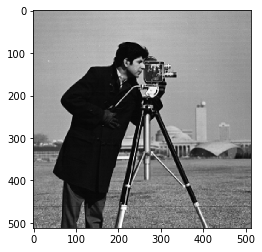

In [14]:
# Lets get a picture/image
image = data.camera() # note data is built-in data from the scikit-image package
# But what is this an image of
plt.imshow(image, cmap=plt.cm.gray) # imshow is show image from the matplotlib library
plt.show()

In [15]:
type(image)

numpy.ndarray

In [16]:
print(image)
print(image.shape)
print(image.shape[0]*image.shape[1])

[[156 157 160 ... 152 152 152]
 [156 157 159 ... 152 152 152]
 [158 157 156 ... 152 152 152]
 ...
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]]
(512, 512)
262144


In [17]:
# 8-bit images are 0-255 black=0, white=255
print(np.max(image))
print(np.min(image))

255
0


(Wikipedia Paraphase)
A Histogram is an accurate representation of a data's distribution, whereas the data is grouped into bins and the height of each bin is representative of the frequency of occurence in the dataset. 

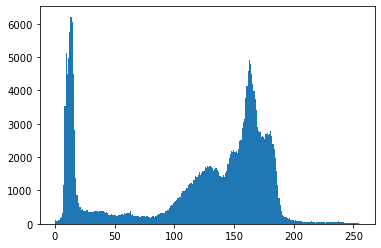

In [52]:
plt.hist(image.ravel(), bins=256)
plt.show()

Excercise: Create a 1D histogram from a 3-dimensional NumPy Array.

In [19]:
# Cell for exercise


Otsu Thresholding (and many other binary thresholding methods) operate on the assumption that the data has a bimodal distribution (two peaks separated by a strong trough). But what does a bimodal distribution look like?

In [20]:
distribution_size = image.shape[0]*image.shape[1]
print(distribution_size)
normal_example = np.random.normal(0, 1, distribution_size)
bimodal_example = np.random.multivariate_normal([0,5], [[1,0],[0,1]], distribution_size)
print(normal_example)
print(bimodal_example)

262144
[-0.71023618 -0.18769762  1.1138081  ...  0.68676364  0.75692297
 -0.42747516]
[[ 0.69231833  5.23438345]
 [-1.63296217  4.18584148]
 [-1.42323132  5.16517696]
 ...
 [-1.18952359  5.20943156]
 [-1.22343067  3.85539457]
 [-1.33869428  2.92370833]]


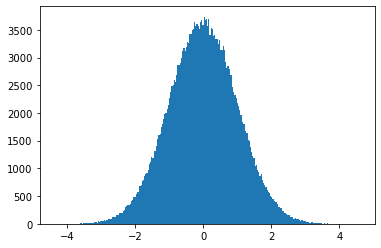

In [21]:
plt.hist(normal_example.ravel(), bins=256)
plt.show()

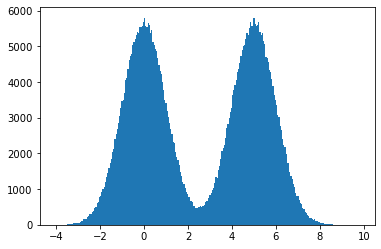

In [22]:
plt.hist(bimodal_example.ravel(), bins=256)
plt.show()

Otsu Thresholding on our toy datasets.

In [23]:
normal_otsu = threshold_otsu(normal_example.ravel())
bimodal_otsu = threshold_otsu(bimodal_example.ravel())
print(normal_otsu)
print(bimodal_otsu)

-0.00404876622858108
2.463836626405189


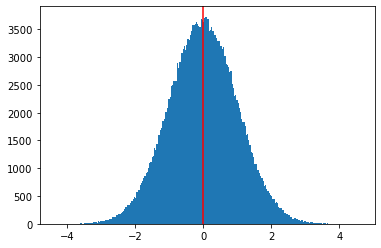

In [24]:
plt.hist(normal_example.ravel(), bins=255)
plt.axvline(normal_otsu, color='r')
plt.show()

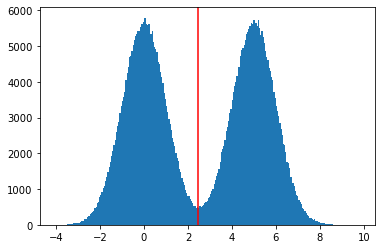

In [25]:
plt.hist(bimodal_example.ravel(), bins=255)
plt.axvline(bimodal_otsu, color='r')
plt.show()

Notice that Otsu for a single normal or Gaussian distribution, the distribution is just split very closely to the mean = 0. However for the bimodal distribution Otsu correctly seperates the two normal distributions from each other. This is the intuition behind most binary image thresholding techniques with the major difference usually being how they determine where to place the threshold line.

Now lets try Otsu Thresholding on a real image.

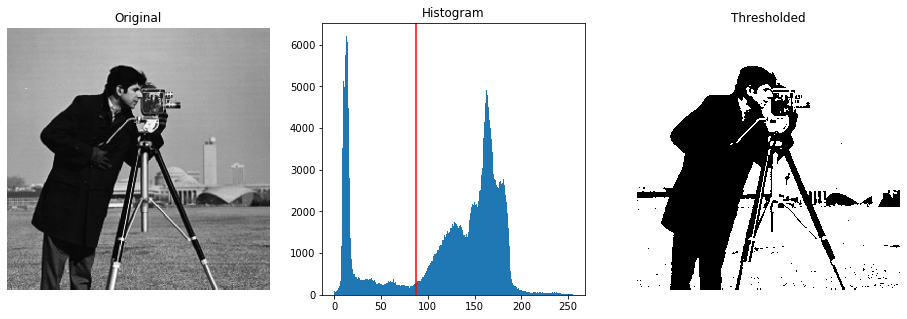

In [26]:
thresh = threshold_otsu(image)
binary = image > thresh # what is this line doing?

fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

While our original image has values from 0-255 as an 8-bit greyscale image, our thresholded image only has values 0 or 1 (i.e. background or foreground, left or right of our red line.)

In [27]:
print(binary)
print(binary.shape)
print(np.max(binary), np.min(binary))

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
(512, 512)
True False


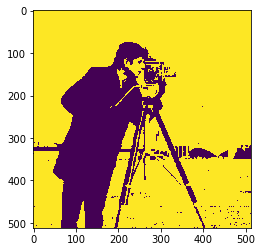

In [28]:
plt.imshow(binary==True)
plt.show()

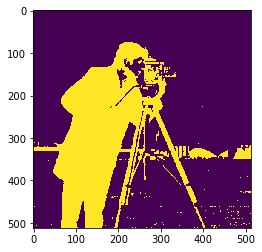

In [29]:
plt.imshow(binary==False)
plt.show()

At this point you might have the following questions:
    What about other Thresholding methods?
    What about satellite data? I...I thought there would be satellites...satellites...
    What about reducing errors?

Satellite Imagery Data and Analysis

There are many uses for satellite imagery and all different types, resolutions (spatial & temporal), and applications exist. In this notebook we will be using satellite imagery to answer a very specific real world application with no tricks, b.s., or toy datasets. Here be dragons...

Context: Water Agencies across the country are typically responsible for maintaining, creating, or quantifying existing habitat for protected species under the Endangered Species Act (ESA). In certain cases advanced biological habitat modeling and/or life cycle modeling of the species is conducted by these agencies to track the progress of the species and to model the effect certain actions may have on a given population or species. In the case of salmon which spawn in freshwater riverine habitats but migrate to the ocean for most of their adult life, the quantification of temporary floodplain or seasonal wetland habitat is a critical model input and a useful criteria for accessing restoration activities (i.e. restoring old or building new habitat). It has been established in the academic literature that these temporary floodplain or seasonal wetland habitats that salmonids sometimes have access too, significantly increase the growth and size of the salmonids before they return the ocean and travel through estuaries (It is often that case that increased size == increased surviability).

Initial Problem: How to identify over a massive area temporary floodplain and seasonal wetland habitat possibly used by salmonids, without using biologists or survey crews to manually survey the area? And how to not require manual labelling of habitat from imagery?

Technical Problem: How to create, validate, and deploy a scalable floodplain/wetland delineation system/tool that requires high resolution data in space and time using remote sensing (satellite imagery) and machine/(deep) learning?
    
Possible Solutions:  
1. 42  
2. Image Thresholding (Traditional literature method -> prone to errors)  
3. Unsupervised Machine Learning (clustering -> unstable, limited reproducibility)  
4. Deep Learning (hype train -> significant hyperparameter optimization -> requires large labelled datasets)  
5. Choose a different problem  
*Note: Solutions 1 and 5 may not be useful

As you may have guessed, we will choose option 2 to continue exploring Image Thresholding.

In [30]:
from skimage.filters import (try_all_threshold, threshold_niblack, threshold_sauvola,
                             threshold_mean, threshold_li, threshold_yen, threshold_isodata,
                             threshold_minimum, threshold_triangle)

In [31]:
# NDWI is a remote sensing index or derived band from other bands that is particularly good at detecting water
def gen_NDWI(image_path):
    with rasterio.open(image_path) as ds:
        green_band2 = ds.read(2)
        nir_band4 = ds.read(4)
        np.seterr(divide='ignore', invalid='ignore')
        ndwi_array = ((green_band2.astype(float) - nir_band4.astype(float)) / (green_band2.astype(float) + nir_band4.astype(float)))
        ds.close()
    return ndwi_array 

In [32]:
# load images from data folder
dry_img_path = r"C:\Users\zleady\Desktop\ST_1867\TestBed_ReddingImages_ST1867\diatoms\data\20161011.tif"
wet_img_path = r"C:\Users\zleady\Desktop\ST_1867\TestBed_ReddingImages_ST1867\diatoms\data\20170228.tif"
ndwi_dry = gen_NDWI(dry_img_path)
ndwi_wet = gen_NDWI(wet_img_path)
print(ndwi_dry.shape, ndwi_wet.shape)

(1000, 1000) (1000, 1000)


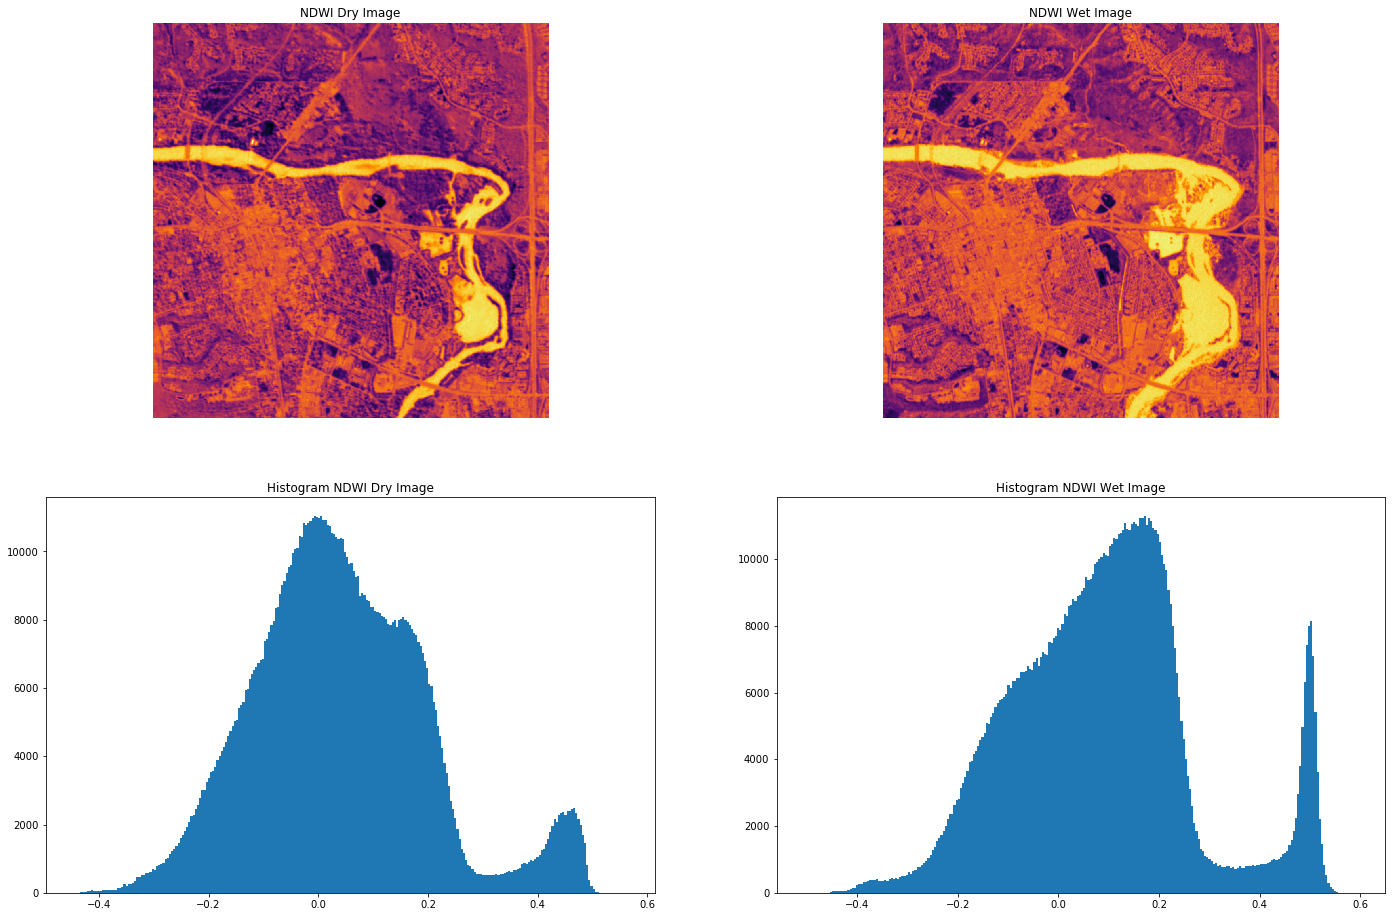

In [33]:
plt.figure(figsize=(24,16))
plt.subplot(2, 2, 1)
plt.imshow(ndwi_dry, cmap=plt.cm.inferno)
plt.title('NDWI Dry Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(ndwi_wet, cmap=plt.cm.inferno)
plt.title('NDWI Wet Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.hist(ndwi_dry.ravel(), bins=256)
plt.title('Histogram NDWI Dry Image')

plt.subplot(2, 2, 4)
plt.hist(ndwi_wet.ravel(), bins=256)
plt.title('Histogram NDWI Wet Image')
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


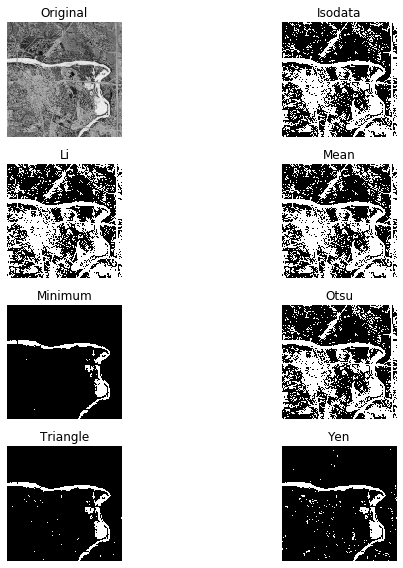

In [34]:
fig, ax = try_all_threshold(ndwi_dry, figsize=(10,8), verbose=True)
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


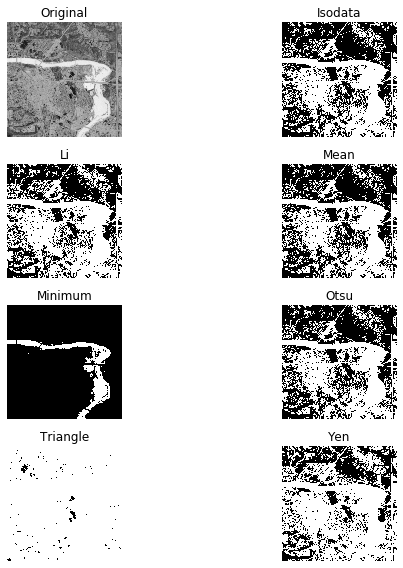

In [35]:
fig, ax = try_all_threshold(ndwi_wet, figsize=(10,8), verbose=True)
plt.show()

In [36]:
threshold_minimum?

Signature: threshold_minimum(image, nbins=256, max_iter=10000)
Docstring:
Return threshold value based on minimum method.

The histogram of the input `image` is computed and smoothed until there are
only two maxima. Then the minimum in between is the threshold value.

Parameters
----------
image : (M, N) ndarray
    Input image.
nbins : int, optional
    Number of bins used to calculate histogram. This value is ignored for
    integer arrays.
max_iter: int, optional
    Maximum number of iterations to smooth the histogram.

Returns
-------
threshold : float
    Upper threshold value. All pixels with an intensity higher than
    this value are assumed to be foreground.

Raises
------
RuntimeError
    If unable to find two local maxima in the histogram or if the
    smoothing takes more than 1e4 iterations.

References
----------
.. [1] C. A. Glasbey, "An analysis of histogram-based thresholding
       algorithms," CVGIP: Graphical Models and Image Processing,
       vol. 55, pp. 532-537

In [37]:
threshold_minimum??

Signature: threshold_minimum(image, nbins=256, max_iter=10000)
Source:   
def threshold_minimum(image, nbins=256, max_iter=10000):
    """Return threshold value based on minimum method.

    The histogram of the input `image` is computed and smoothed until there are
    only two maxima. Then the minimum in between is the threshold value.

    Parameters
    ----------
    image : (M, N) ndarray
        Input image.
    nbins : int, optional
        Number of bins used to calculate histogram. This value is ignored for
        integer arrays.
    max_iter: int, optional
        Maximum number of iterations to smooth the histogram.

    Returns
    -------
    threshold : float
        Upper threshold value. All pixels with an intensity higher than
        this value are assumed to be foreground.

    Raises
    ------
    RuntimeError
        If unable to find two local maxima in the histogram or if the
        smoothing takes more than 1e4 iterations.

    References
    ----------
    

In [38]:
%timeit (threshold_minimum(ndwi_dry))

16.9 ms ± 237 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
threshold_dry = threshold_minimum(ndwi_dry)
threshold_wet = threshold_minimum(ndwi_wet)
threshold_dry_otsu = threshold_otsu(ndwi_dry)
threshold_wet_otsu = threshold_otsu(ndwi_wet)
print(threshold_dry)
print(threshold_wet)
ndwi_dry_thresh = ndwi_dry > threshold_dry
ndwi_wet_thresh = ndwi_wet > threshold_wet

0.31287783477400394
0.35167711130692125


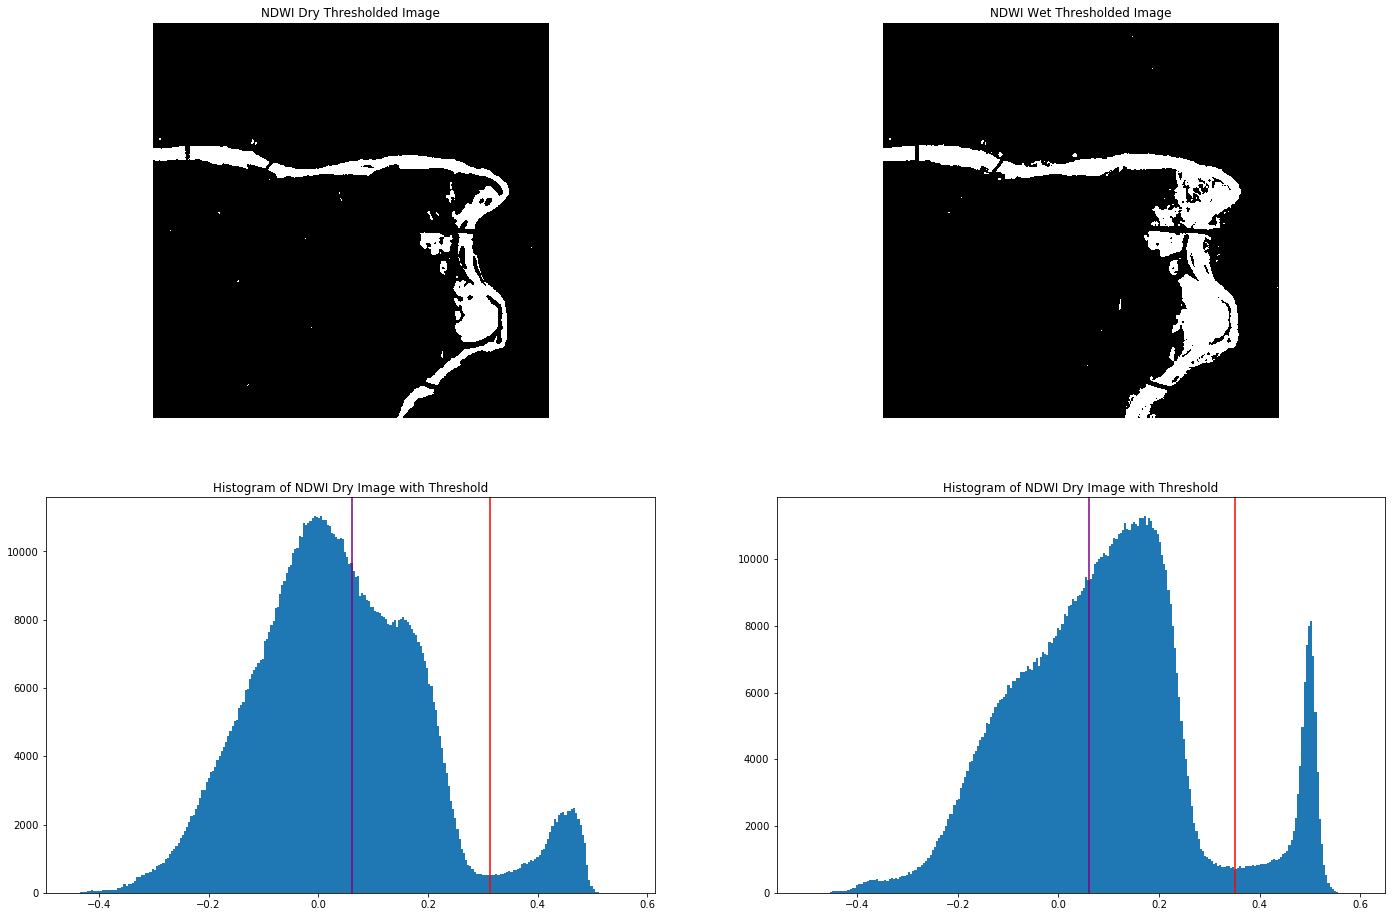

In [40]:
plt.figure(figsize=(24,16))
plt.subplot(2, 2, 1)
plt.imshow(ndwi_dry_thresh, cmap=plt.cm.gray)
plt.title('NDWI Dry Thresholded Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(ndwi_wet_thresh, cmap=plt.cm.gray)
plt.title('NDWI Wet Thresholded Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.hist(ndwi_dry.ravel(), bins=256)
plt.axvline(threshold_dry, color='r')
plt.axvline(threshold_dry_otsu, color='purple')
plt.title('Histogram of NDWI Dry Image with Threshold')

plt.subplot(2, 2, 4)
plt.hist(ndwi_wet.ravel(), bins=256)
plt.axvline(threshold_wet, color='r')
plt.axvline(threshold_dry_otsu, color='purple')
plt.title('Histogram of NDWI Dry Image with Threshold')
plt.show()

In [41]:
# ^ is the bitwise boolean operator for subtraction
dry_wet = ndwi_dry_thresh ^ ndwi_wet_thresh
wet_dry = ndwi_wet_thresh ^ ndwi_dry_thresh

(-0.5, 999.5, 999.5, -0.5)

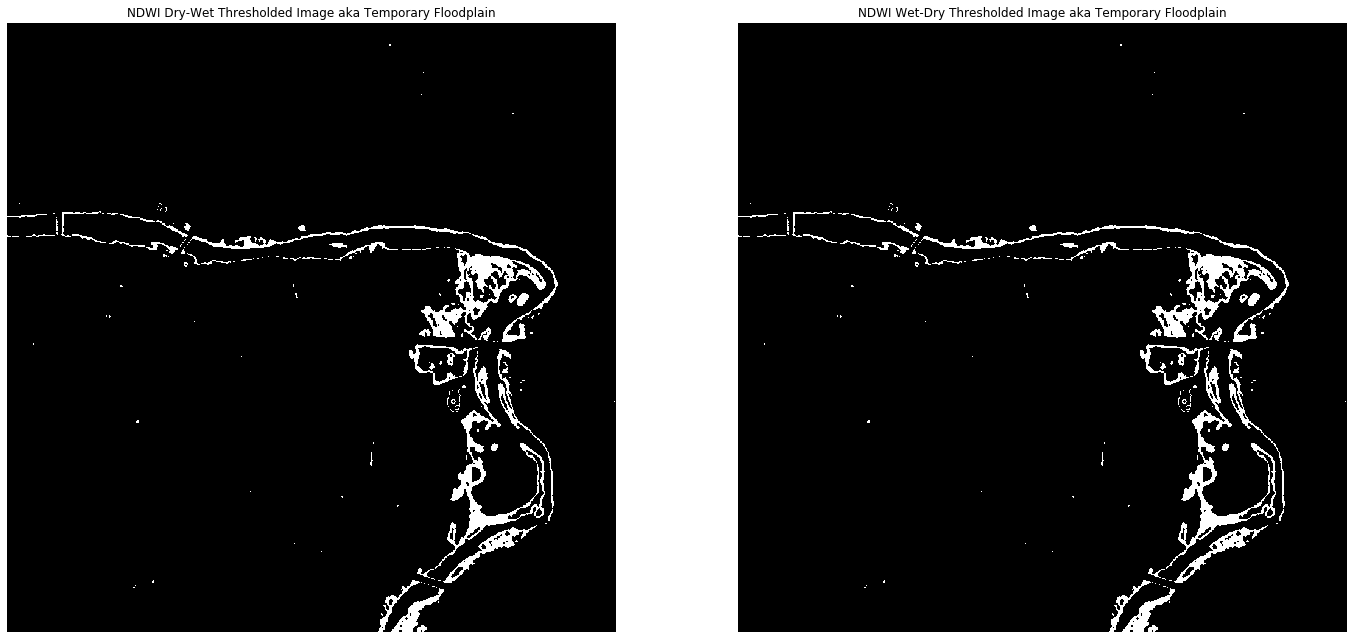

In [53]:
plt.figure(figsize=(24,16))
plt.subplot(1, 2, 1)
plt.imshow(dry_wet, cmap=plt.cm.gray)
plt.title('NDWI Dry-Wet Thresholded Image aka Temporary Floodplain')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wet_dry, cmap=plt.cm.gray)
plt.title('NDWI Wet-Dry Thresholded Image aka Temporary Floodplain')
plt.axis('off')

In [43]:
wd_sum = np.sum(wet_dry)
dw_sum = np.sum(dry_wet)
print(wd_sum, dw_sum)

32498 32498


In [44]:
# Each pixel is 4 meters x 4 meters
pixel_area = 4*4
total_area_true = 32498*pixel_area
print(pixel_area, total_area_true)

16 519968


In [45]:
# Acres
total_area_true_acres = total_area_true / 4046.856
print(round(total_area_true_acres))

128


In [46]:
wet_sum = np.sum(ndwi_wet_thresh)
dry_sum = np.sum(ndwi_dry_thresh)
print(wet_sum, dry_sum)
print(wet_sum*pixel_area, dry_sum*pixel_area)
print((wet_sum*pixel_area)/4046.856, (dry_sum*pixel_area)/4046.856)

92870 60898
1485920 974368
367.17886675483385 240.77160146049178


[0 1 2]


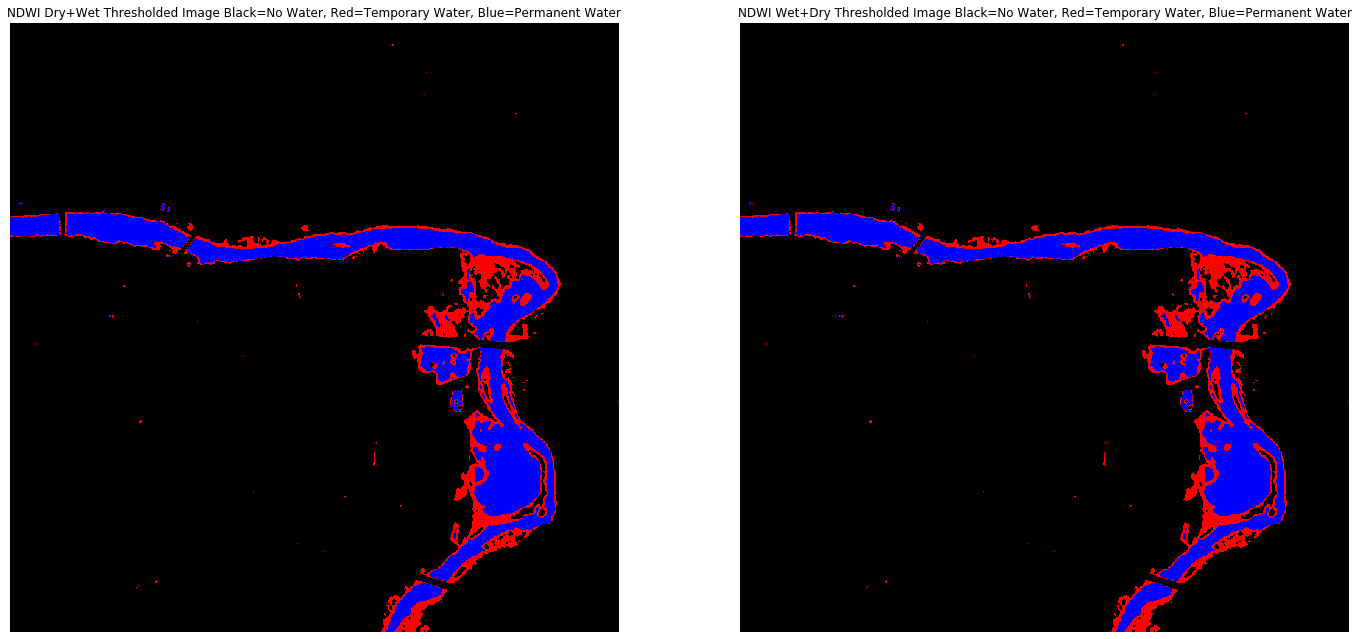

In [54]:
dry_wet_sum = ndwi_dry_thresh.astype(int) + ndwi_wet_thresh.astype(int)
wet_dry_sum = ndwi_wet_thresh.astype(int) + ndwi_dry_thresh.astype(int)
print(np.unique(dry_wet_sum))
Customcmap = matplotlib.colors.ListedColormap(['black', 'red', 'blue'])
plt.figure(figsize=(24,16))
plt.subplot(1, 2, 1)
plt.imshow(dry_wet_sum, cmap=Customcmap)
plt.title('NDWI Dry+Wet Thresholded Image Black=No Water, Red=Temporary Water, Blue=Permanent Water')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wet_dry_sum, cmap=Customcmap)
plt.title('NDWI Wet+Dry Thresholded Image Black=No Water, Red=Temporary Water, Blue=Permanent Water')
plt.axis('off')
plt.show()

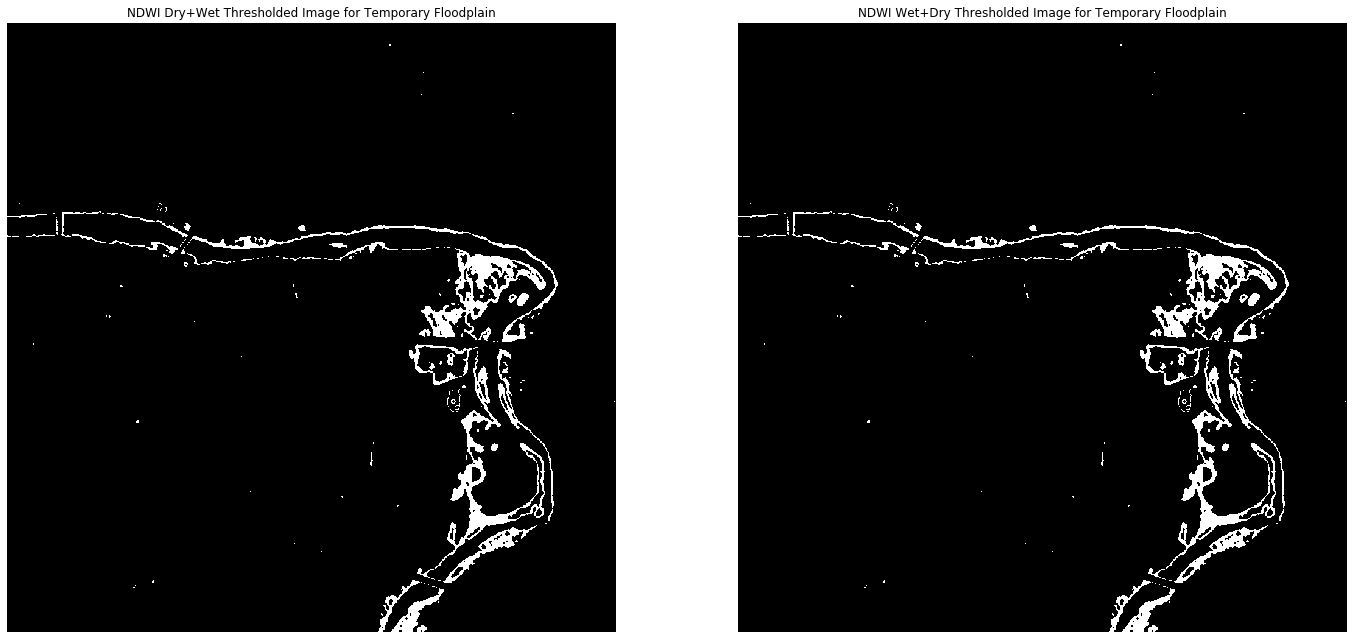

In [55]:
# Why v == 1?
dws = (dry_wet_sum == 1)
wds = (wet_dry_sum == 1)
plt.figure(figsize=(24,16))
plt.subplot(1, 2, 1)
plt.imshow(dws, cmap=plt.cm.gray)
plt.title('NDWI Dry+Wet Thresholded Image for Temporary Floodplain')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wds, cmap=plt.cm.gray)
plt.title('NDWI Wet+Dry Thresholded Image for Temporary Floodplain')
plt.axis('off')
plt.show()

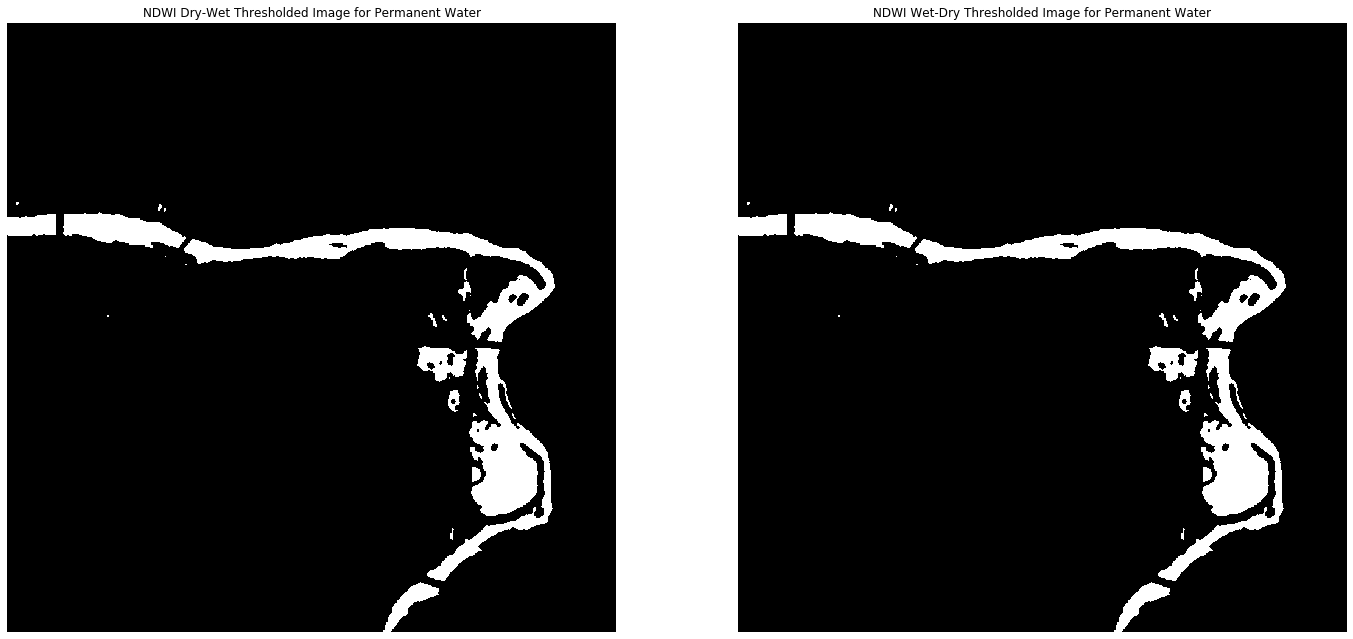

In [56]:
# Why v == 2?
dws2 = (dry_wet_sum == 2)
wds2 = (wet_dry_sum == 2)
plt.figure(figsize=(24,16))
plt.subplot(1, 2, 1)
plt.imshow(dws2, cmap=plt.cm.gray)
plt.title('NDWI Dry-Wet Thresholded Image for Permanent Water')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wds2, cmap=plt.cm.gray)
plt.title('NDWI Wet-Dry Thresholded Image for Permanent Water')
plt.axis('off')
plt.show()

Excercise for the rest of class: Attempt to do the same analysis with NDVI. 

Answer:
1. What is NDVI delineating? 
2. How could you combine NDWI and NDVI?
3. How scalable are these methods?
4. How might you use this traditional image thresholding method with Deep Learning? (Hint: Think of what two components you need to train a CNN.)

Challenge Exercise: Given an array of integers return the indices of the two numbers that sum to a target value. Only one solution exists in a given array.

Given nums = [2, 7, 11, 15] and target = 9, your function should return [0, 1]

In [51]:
# hint you should not iterate over the list...(i.e. what data structure has faster retrieval than an array?)
def twoSum(nums, target):
    
    return [index1, index2]